# Binary Classification Model using CNN built from scratch.
## Making predictions.

## Imports

### Libraries 

In [8]:
# General imports
import numpy as np
import random

# System and file management
import os
import argparse

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from skimage.io import imread
import imutils
import cv2

# DICOM
import pydicom
from pydicom.filereader import dcmread

# jupyter
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

# Tensorflow
import keras
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.optimizers import SGD
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

### Paths 

In [2]:
PATH = 'data/' # root
CSV_PATH = os.path.join(PATH,'csv') # folder with csv datasets
DICOM_PATH = os.path.join(PATH, 'pool') # folder containing all of the dicom files
JPG_PATH = os.path.join(PATH, 'pool_jpg') # folder containing all the converted jpg files
DESTINATION_PATH = os.path.join(PATH, 'sorted_balanced') # Folder where the train and test subsets will be located

# Test folder
TEST_PATH = os.path.join(DESTINATION_PATH, 'test')
TEST_NORMAL_PATH = os.path.join(TEST_PATH, 'normal') 
TEST_PNEUMONIA_PATH = os.path.join(TEST_PATH, 'pneumonia') 

# Real life picture folders
SHOW_PATH = os.path.join(PATH, 'show')
SHOW_NORMAL_PATH = os.path.join(SHOW_PATH, 'normal')
SHOW_PNEUMONIA_PATH = os.path.join(SHOW_PATH, 'pneumonia')

### Functions 

In [3]:
def predict_xray(img_path, ground_truth='pneumonia'):
    """
    This function uses the pre-trained model to predict whether a given image has pneumonia or not.
    Inputs:
        - img_path: route to image file.
        - ground_truth: wether the image is normal or the patient has pneumonia.
    Outputs:
        - A print of the ground-truth.
        - The plotted X-Ray
        - Prediction made by the model.
    """
    # Image preprocessing:
    img_width, img_height = 128, 128
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_width, img_height))
    img = img.astype('float') / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    
    # Prediction generation:
    result = model.predict(img)
    pred = np.argmax(result, axis=1)
    prediction = 'Sorry, no prediction could be generated'
    if(pred[0] == 0):
        prediction = "Normal"
    else:
        prediction = "Pneumonia"
    
    # Plotting image and prediction:
    plt.figure(figsize=(10,10))
    img_plot = mpimg.imread(img_path)
    plt.imshow(img_plot,  cmap=plt.get_cmap('gray'))
    plt.axis('Off')
    plt.suptitle('X-ray image: '+ ground_truth, fontsize=22, fontweight=800)
    plt.title("Model prediction: " + prediction, fontsize=25, fontweight=800)
    plt.show()

## Loading models 

In [4]:
model_path = './models/4_2_Model_Binary_from_directory_balanced.h5'

In [10]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model(model_path, compile=False)

model.compile(loss = "binary_crossentropy", 
              optimizer = SGD(lr=0.001, momentum=0.9), 
              metrics=["accuracy"])

## Testing with Test Data 

Randomly choosing Chest X-Raysfrom the test subset and predicting their classes.

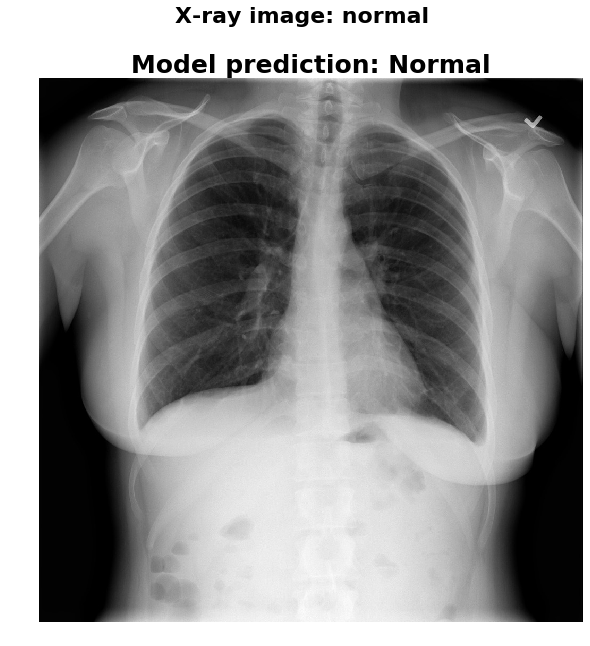

In [11]:
img_to_test = os.path.join(TEST_NORMAL_PATH, os.listdir(TEST_NORMAL_PATH)[random.randint(1, len(os.listdir(TEST_NORMAL_PATH)))])
predict_xray(img_to_test,ground_truth='normal')

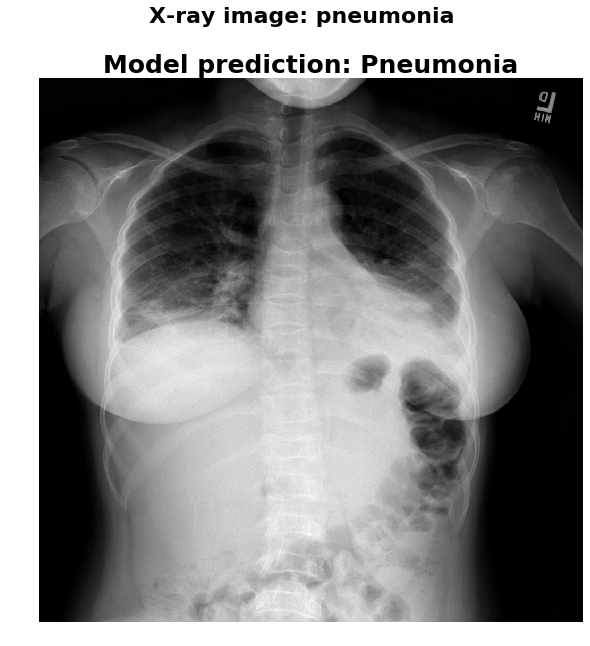

In [12]:
img_to_test = os.path.join(TEST_PNEUMONIA_PATH, os.listdir(TEST_PNEUMONIA_PATH)[random.randint(1, len(os.listdir(TEST_PNEUMONIA_PATH)))])
predict_xray(img_to_test,ground_truth='pneumonia')

## Testing with Real World Data

Randomly choosing Chest X-Rays downloaded from the internet and predicting their classes.

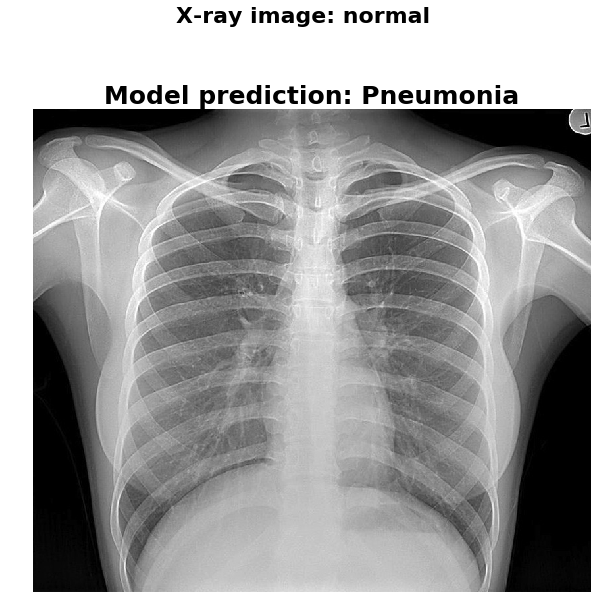

In [14]:
img_to_test = os.path.join(SHOW_NORMAL_PATH, os.listdir(SHOW_NORMAL_PATH)[random.randint(1, len(os.listdir(SHOW_NORMAL_PATH))-1)])
predict_xray(img_to_test,ground_truth='normal')

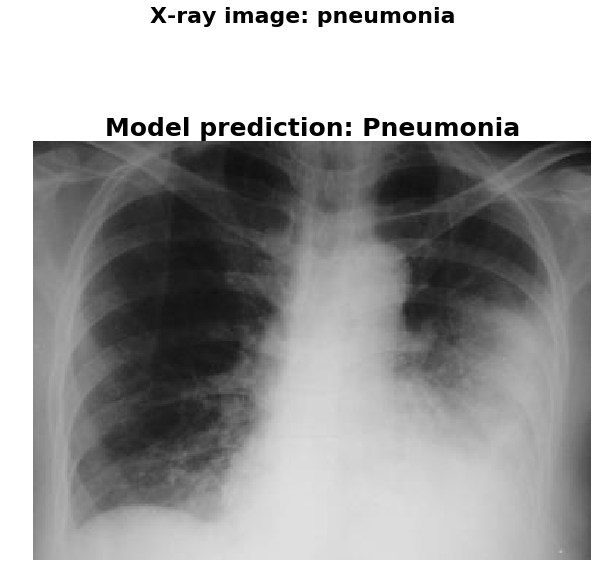

In [17]:
img_to_test = os.path.join(SHOW_PNEUMONIA_PATH, os.listdir(SHOW_PNEUMONIA_PATH)[random.randint(1, len(os.listdir(SHOW_PNEUMONIA_PATH)))])
predict_xray(img_to_test,ground_truth='pneumonia')